**Uncomment the cell below if running on Google Colab or Kaggle**

In [1]:
# %%capture
# !pip3 install -U torch torchvision torchaudio
# !pip3 install -U fastai==2.7.6
# !pip3 install -U kaggle==1.5.12
# !pip3 install -U Pillow==9.1.0
# !pip3 install -U timm==0.6.5 # more stable fewer models
# # !pip3 install -U git+https://github.com/rwightman/pytorch-image-models.git # more models less stable
# !pip3 install openvino-dev==2022.1.0 

**Note for Colab:**  You must restart the runtime in order to use newly installed version of Pillow.

**Import all fastai computer vision functionality**

In [2]:
from fastai.vision.all import *

In [3]:
import fastai

In [4]:
fastai.__version__

'2.7.6'

**Disable max rows and columns for pandas**

In [5]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Import the Timm library**

In [6]:
import timm

In [7]:
timm.__version__

'0.6.5'

**Check available pretrained model types**

In [8]:
model_types = list(set([model.split('_')[0] for model in timm.list_models(pretrained=True)]))
model_types.sort()
pd.DataFrame(model_types)

,0
0,adv
1,bat
2,beit
3,botnet26t
4,cait
5,coat
6,convit
7,convmixer
8,convnext
9,crossvit


**Check available pretrained [ConvNeXt](https://arxiv.org/abs/2201.03545) models**

In [9]:
pd.DataFrame(timm.list_models('convnext*', pretrained=True))

,0
0,convnext_base
1,convnext_base_384_in22ft1k
2,convnext_base_in22ft1k
3,convnext_base_in22k
4,convnext_large
5,convnext_large_384_in22ft1k
6,convnext_large_in22ft1k
7,convnext_large_in22k
8,convnext_small
9,convnext_small_384_in22ft1k


**Inspect the default configuration for the `convnext_tiny` model**

In [10]:
from timm.models import convnext
convnext_model = 'convnext_tiny'
pd.DataFrame.from_dict(convnext.default_cfgs[convnext_model], orient='index')

,0
url,https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth
num_classes,1000
input_size,"(3, 224, 224)"
pool_size,"(7, 7)"
crop_pct,0.875
interpolation,bicubic
mean,"(0.485, 0.456, 0.406)"
std,"(0.229, 0.224, 0.225)"
first_conv,stem.0
classifier,head.fc


**Check available pretrained [MobileNetV2](https://arxiv.org/abs/1801.04381) models**

In [11]:
pd.DataFrame(timm.list_models('mobilenetv2*', pretrained=True))

,0
0,mobilenetv2_050
1,mobilenetv2_100
2,mobilenetv2_110d
3,mobilenetv2_120d
4,mobilenetv2_140


**Inspect the default configuration for the `mobilenetv2_100` model**

In [12]:
from timm.models import efficientnet
mobilenetv2_model = 'mobilenetv2_100'
pd.DataFrame.from_dict(efficientnet.default_cfgs[mobilenetv2_model], orient='index')

,0
url,https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv2_100_ra-b33bc2c4.pth
num_classes,1000
input_size,"(3, 224, 224)"
pool_size,"(7, 7)"
crop_pct,0.875
interpolation,bicubic
mean,"(0.485, 0.456, 0.406)"
std,"(0.229, 0.224, 0.225)"
first_conv,conv_stem
classifier,classifier


**Check available pretrained [ResNet]() models**

In [13]:
pd.DataFrame(timm.list_models('resnet*', pretrained=True))

,0
0,resnet10t
1,resnet14t
2,resnet18
3,resnet18d
4,resnet26
5,resnet26d
6,resnet26t
7,resnet32ts
8,resnet33ts
9,resnet34


**Inspect the default configuration for the `resnet10t` model**

In [14]:
from timm.models import resnet
resnet_model = 'resnet10t'
pd.DataFrame.from_dict(resnet.default_cfgs[resnet_model], orient='index')

,0
url,https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet10t_176_c3-f3215ab1.pth
num_classes,1000
input_size,"(3, 176, 176)"
pool_size,"(6, 6)"
crop_pct,0.875
interpolation,bilinear
mean,"(0.485, 0.456, 0.406)"
std,"(0.229, 0.224, 0.225)"
first_conv,conv1.0
classifier,fc


**Select a model**

In [15]:
# model_type = convnext
# model_name = convnext_model
# model_type = efficientnet
# model_name = mobilenetv2_model
model_type = resnet
model_name = resnet_model

**Store normalization stats**

In [16]:
mean = model_type.default_cfgs[model_name]['mean']
std = model_type.default_cfgs[model_name]['std']
mean, std

((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

### Kaggle API
* [GitHub Repository](https://github.com/Kaggle/kaggle-api)
* [Documentation](https://github.com/Kaggle/kaggle-api#competitions)
* Install: `pip install kaggle`
* Need to get an API Key for your Kaggle account
    * [https://www.kaggle.com/me/account](https://www.kaggle.com/me/account)

**Enter Kaggle username and API token**

In [17]:
creds = '{"username":"","key":""}'

**Save Kaggle credentials if none are present**
* **Source:** [https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb](https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb)

In [18]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
# Save API key to a json file if it does not already exist
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

**Import Kaggle API**

In [19]:
from kaggle import api

**Define method to display default function arguments**

In [20]:
import inspect

def inspect_default_args(target, annotations: bool=False):
    # Get the argument names
    args = inspect.getfullargspec(target).args
    # Get the default values
    defaults = inspect.getfullargspec(target).defaults

    index = ["Default Value"]

    # Pad defaults
    defaults = [None]*(len(args)-len(defaults)) + list(defaults)
    if annotations:
        index.append("Annotation")
        annotations = inspect.getfullargspec(target).annotations.values()
        # Pad annotations
        annotations = [None]*(len(args)-len(annotations)) + list(annotations)
        default_args = {arg:[df, annot] for arg,df,annot in zip(args, defaults, annotations)}
    else:
        default_args = {arg:[default] for arg,default in zip(args, defaults)}
        
    return pd.DataFrame(default_args, index=index).T

**Define path to dataset**

In [21]:
kaggle_dataset = 'belalelwikel/asl-and-some-words'
archive_dir = URLs.path()
dataset_dir = archive_dir/'../data'
dataset_name = 'asl-and-some-words'
archive_path = Path(f'{archive_dir}/{dataset_name}.zip')
dataset_path = Path(f'{dataset_dir}/{dataset_name}')

**Define method to extract the dataset from an archive file**

In [22]:
def file_extract(fname, dest=None):
    "Extract `fname` to `dest` using `tarfile` or `zipfile`."
    if dest is None: dest = Path(fname).parent
    fname = str(fname)
    if   fname.endswith('gz'):  tarfile.open(fname, 'r:gz').extractall(dest)
    elif fname.endswith('zip'): zipfile.ZipFile(fname     ).extractall(dest)
    else: raise Exception(f'Unrecognized archive: {fname}')

**Download the dataset if it is not present**

In [23]:
if not archive_path.exists():
    api.dataset_download_cli(kaggle_dataset, path=archive_dir)
    file_extract(fname=archive_path, dest=dataset_path)

**Inspect the dataset path**

In [24]:
dataset_path.ls()

(#1) [Path('/home/innom-dt/.fastai/archive/../data/asl-and-some-words/ASL')]

**Get image file paths**

In [25]:
files = get_image_files(dataset_path/"ASL")
len(files)

203000

**Inspect files**

In [26]:
files[0], files[-1]

(Path('/home/innom-dt/.fastai/archive/../data/asl-and-some-words/ASL/J/J1491.jpg'),
 Path('/home/innom-dt/.fastai/archive/../data/asl-and-some-words/ASL/E/E1063.jpg'))

**Inspect class folder names**

In [27]:
folder_names = [path.name for path in Path(dataset_path/'ASL').ls()]
if 'models' in folder_names: folder_names.remove('models')
folder_names.sort()
print(f"Num classes: {len(folder_names)}")
pd.DataFrame(folder_names)

Num classes: 51


,0
0,1
1,3
2,4
3,5
4,7
5,8
6,9
7,A
8,B
9,Baby


**Inspect one of the training images**

Image Dims: (200, 200)


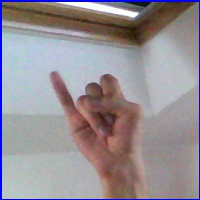

In [28]:
import PIL
img = PIL.Image.open(files[0])
print(f"Image Dims: {img.shape}")
img

**Define target input dimensions**

In [29]:
# size_1_1 = (224, 224)
# size_3_2 = (224, 336)
# size_4_3 = (216, 288)
size_16_9 = (216, 384)
# size_16_9_l = (288, 512)

In [30]:
input_dims = size_16_9

**Define Transforms**

In [31]:
inspect_default_args(aug_transforms)

,Default Value
mult,1
do_flip,True
flip_vert,False
max_rotate,10
min_zoom,1
max_zoom,1.1
max_lighting,0.2
max_warp,0.2
p_affine,0.75
p_lighting,0.75


In [32]:
item_tfms = [FlipItem(p=1.0), Resize(input_dims, method=ResizeMethod.Pad, pad_mode=PadMode.Border)]

batch_tfms = [
    Contrast(max_lighting=0.25),
    Saturation(max_lighting=0.25),
    Hue(max_hue=0.05),
    *aug_transforms(
        size=input_dims, 
        mult=1.0,
        do_flip=False,
        flip_vert=False,
        max_rotate=0.0,
        min_zoom=0.5,
        max_zoom=1.5,
        max_lighting=0.5,
        max_warp=0.2, 
        p_affine=0.0,
        pad_mode=PadMode.Border),
    Normalize.from_stats(mean=mean, std=std)
]

**Define batch size**
* Adjust based on available GPU memory.

In [33]:
bs = 128

**Define DataLoaders object**

In [34]:
inspect_default_args(ImageDataLoaders.from_folder)

,Default Value
cls,None
path,None
train,train
valid,valid
valid_pct,None
seed,None
vocab,None
item_tfms,None
batch_tfms,None
bs,64


In [35]:
dls = ImageDataLoaders.from_folder(
    path=dataset_path/'ASL', 
    valid_pct=0.2, 
    bs=bs, 
    item_tfms=item_tfms, 
    batch_tfms=batch_tfms
)

**Verify DataLoaders object**

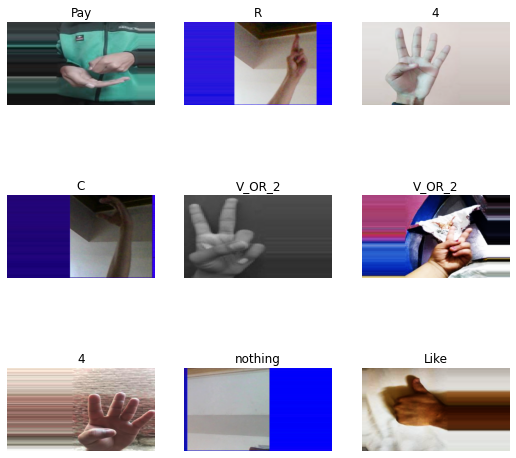

In [36]:
dls.train.show_batch()

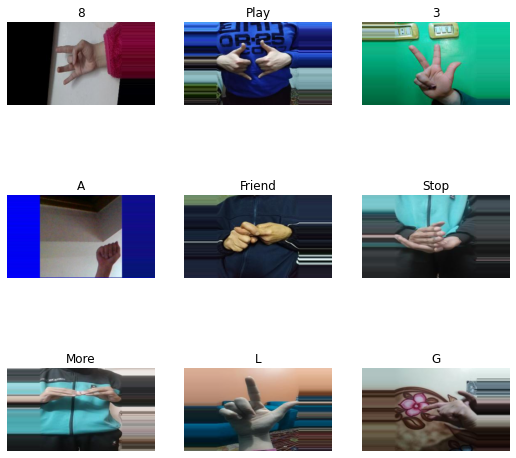

In [37]:
dls.valid.show_batch()

**Apply training split transforms to validation split**

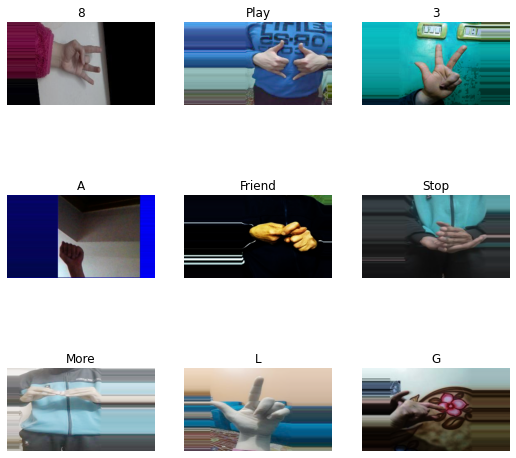

In [38]:
with dls.valid.dataset.set_split_idx(0): dls[1].show_batch()

**Inspect Learner parameters**

In [39]:
inspect_default_args(vision_learner)

,Default Value
dls,None
arch,None
normalize,True
n_out,None
pretrained,True
loss_func,None
opt_func,<function Adam at 0x7fd169d7d8b0>
lr,0.001
splitter,None
cbs,None


**Define [metrics](https://docs.fast.ai/metrics.html)**

In [40]:
metrics = [error_rate, accuracy]

**Define Learner object**

In [41]:
learn = vision_learner(dls, model_name, metrics=metrics).to_fp16()

**Find learning rate**

In [42]:
inspect_default_args(learn.lr_find)

,Default Value
self,None
start_lr,1e-07
end_lr,10
num_it,100
stop_div,True
show_plot,True
suggest_funcs,<function valley at 0x7fd169c91d30>


**Define [suggestion methods](https://docs.fast.ai/callback.schedule.html#Suggestion-Methods)**

In [43]:
suggest_funcs = [valley, minimum, steep]

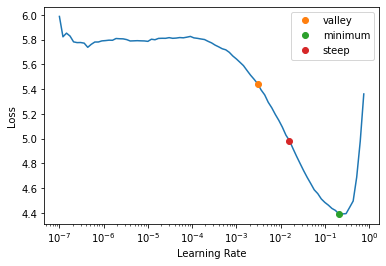

In [44]:
with dls.valid.dataset.set_split_idx(0): learn.lr_find(suggest_funcs=suggest_funcs)

**Define learning rate**

In [45]:
lr = 3e-3
lr

0.003

**Define number of epochs**

In [46]:
epochs = 4

**Fine tune model**

In [47]:
inspect_default_args(learn.fine_tune)

,Default Value
self,None
epochs,None
base_lr,0.002
freeze_epochs,1
lr_mult,100
pct_start,0.3
div,5
lr_max,None
div_final,100000
wd,None


In [48]:
with dls.valid.dataset.set_split_idx(0): learn.fine_tune(epochs, base_lr=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.730371,0.396973,0.121749,0.878251,03:37


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.211063,0.102675,0.032660,0.967340,03:53
1,0.091656,0.042847,0.012980,0.987020,04:07
2,0.056705,0.021814,0.008030,0.991970,04:06
3,0.044031,0.018174,0.006650,0.993350,04:09


**Select a test image**

In [49]:
import PIL

In [50]:
test_file = files[0]
test_file.name

'J1491.jpg'

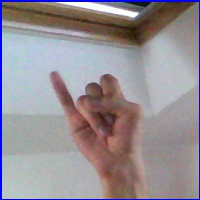

In [51]:
test_img = PIL.Image.open(test_file)
test_img

**Make a prediction on a single image using a [fastai.vision.core.PILImage](https://docs.fast.ai/vision.core.html#PILImage)**

In [52]:
learn.predict(PILImage(test_img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)))

('J',
 TensorBase(22),
 TensorBase([2.7811e-17, 2.1575e-17, 3.2642e-17, 2.2087e-17, 2.5791e-12, 1.3888e-11,
         1.9392e-12, 5.8541e-16, 7.9824e-19, 1.7758e-13, 1.6379e-18, 1.2286e-21,
         5.4665e-17, 6.5151e-19, 2.0761e-13, 2.5934e-14, 6.6716e-17, 4.0770e-19,
         1.3149e-11, 1.7649e-15, 4.6856e-16, 2.8737e-07, 1.0000e+00, 2.7491e-16,
         6.3660e-17, 1.5875e-18, 1.1600e-13, 1.1654e-15, 2.5861e-20, 8.8863e-20,
         2.6802e-16, 9.9097e-16, 5.5726e-19, 9.2125e-14, 1.7383e-12, 2.3614e-14,
         1.6868e-17, 4.1425e-17, 1.0166e-14, 7.0933e-12, 5.6876e-13, 4.0054e-20,
         8.4374e-14, 2.5269e-18, 8.8357e-19, 1.4200e-19, 9.9912e-20, 3.6667e-10,
         2.2740e-18, 8.4045e-14, 1.5960e-15]))

**Make predictions for a group of images**

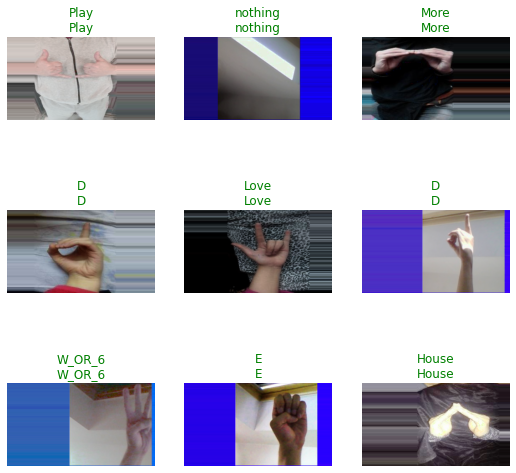

In [53]:
with dls.valid.dataset.set_split_idx(0): learn.show_results()

**Define an Interpretation object**

In [54]:
with dls.valid.dataset.set_split_idx(0): interp = Interpretation.from_learner(learn)

**Plot top losses**

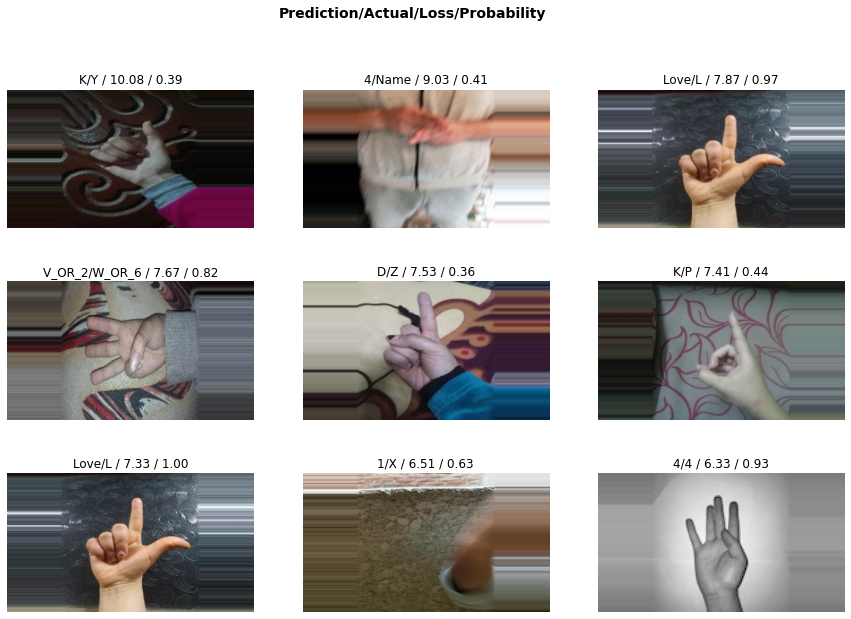

In [55]:
with dls.valid.dataset.set_split_idx(0): interp.plot_top_losses(k=9, figsize=(15,10))

**Inspect the `after_item` pipeline**

In [56]:
learn.dls.after_item

Pipeline: FlipItem -- {'p': 1.0} -> Resize -- {'size': (384, 216), 'method': 'pad', 'pad_mode': 'border', 'resamples': (<Resampling.BILINEAR: 2>, <Resampling.NEAREST: 0>), 'p': 1.0} -> ToTensor

**Inspect the `after_batch` pipeline**

In [57]:
learn.dls.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Warp -- {'magnitude': 0.2, 'p': 1.0, 'draw_x': None, 'draw_y': None, 'size': (216, 384), 'mode': 'bilinear', 'pad_mode': 'border', 'batch': False, 'align_corners': True, 'mode_mask': 'nearest'} -> Contrast -- {'max_lighting': 0.25, 'p': 1.0, 'draw': None, 'batch': False} -> Saturation -- {'max_lighting': 0.25, 'p': 1.0, 'draw': None, 'batch': False} -> Hue -- {'p': 1.0} -> Brightness -- {'max_lighting': 0.5, 'p': 1.0, 'draw': None, 'batch': False} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

**Reset test image**

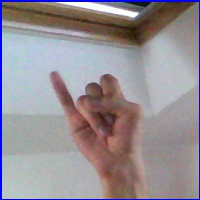

In [58]:
test_img = PIL.Image.open(test_file)
test_img

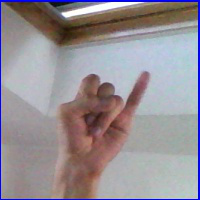

In [59]:
test_img = test_img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
test_img

In [60]:
test_img.size

(200, 200)

In [61]:
min(test_img.size)

200

In [62]:
min_dim = test_img.size.index(min(test_img.size))
max_dim = 1 - min_dim

In [63]:
target_dim = 224

**Set input dims**

In [64]:
inp_dims = [0,0]
inp_dims[min_dim] = target_dim
inp_dims[max_dim] = int(test_img.size[max_dim] / (test_img.size[min_dim]/target_dim))
inp_dims

[224, 224]

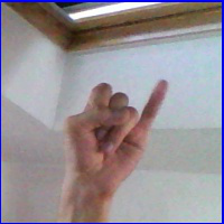

In [65]:
resized_img = test_img.resize(inp_dims)
resized_img

**Convert image to tensor**

In [66]:
img_tensor = tensor(resized_img).permute(2, 0, 1)
img_tensor.shape, img_tensor

(torch.Size([3, 224, 224]),
 tensor([[[  0,   0,   0,  ...,   1,   0,   0],
          [  0,   4,   2,  ...,   9,   2,   0],
          [  5,  82,  99,  ...,  74,   8,   0],
          ...,
          [  3, 127, 154,  ..., 141,   0,   3],
          [  3, 102, 125,  ..., 120,   0,   0],
          [  0,   0,   4,  ...,   0,   1,   0]],
 
         [[  4,   1,   2,  ...,   0,   2,   5],
          [  2,   1,   0,  ...,   0,   0,   5],
          [  0,  75,  91,  ...,  63,   1,   1],
          ...,
          [  3, 126, 150,  ..., 151,   0,   0],
          [  7, 105, 122,  ..., 127,   1,   0],
          [  8,   5,   3,  ...,   4,   6,   2]],
 
         [[253, 254, 255,  ..., 253, 255, 254],
          [244, 220, 199,  ..., 209, 237, 255],
          [212, 222, 180,  ..., 188, 211, 251],
          ...,
          [196, 225, 171,  ..., 238, 204, 255],
          [207, 247, 222,  ..., 242, 218, 255],
          [223, 203, 193,  ..., 219, 247, 254]]], dtype=torch.uint8))

**Scale tensor values**

In [67]:
scaled_tensor = img_tensor.float().div_(255)

**Prepare mean values**

In [68]:
mean_tensor = tensor(mean).view(1,1,-1).permute(2, 0, 1)
mean_tensor.shape, mean_tensor

(torch.Size([3, 1, 1]),
 tensor([[[0.4850]],
 
         [[0.4560]],
 
         [[0.4060]]]))

**Prepare std values**

In [69]:
std_tensor = tensor(std).view(1,1,-1).permute(2, 0, 1)
std_tensor.shape, std_tensor

(torch.Size([3, 1, 1]),
 tensor([[[0.2290]],
 
         [[0.2240]],
 
         [[0.2250]]]))

**Normalize and batch image tensor**

In [70]:
normalized_tensor = (scaled_tensor - mean_tensor) / std_tensor
batched_tensor = normalized_tensor.unsqueeze(dim=0)
batched_tensor.shape, batched_tensor

(torch.Size([1, 3, 224, 224]),
 tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1179, -2.1179],
           [-2.1179, -2.0494, -2.0837,  ..., -1.9638, -2.0837, -2.1179],
           [-2.0323, -0.7137, -0.4226,  ..., -0.8507, -1.9809, -2.1179],
           ...,
           [-2.0665,  0.0569,  0.5193,  ...,  0.2967, -2.1179, -2.0665],
           [-2.0665, -0.3712,  0.0227,  ..., -0.0629, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.0494,  ..., -2.1179, -2.1008, -2.1179]],
 
          [[-1.9657, -2.0182, -2.0007,  ..., -2.0357, -2.0007, -1.9482],
           [-2.0007, -2.0182, -2.0357,  ..., -2.0357, -2.0357, -1.9482],
           [-2.0357, -0.7227, -0.4426,  ..., -0.9328, -2.0182, -2.0182],
           ...,
           [-1.9832,  0.1702,  0.5903,  ...,  0.6078, -2.0357, -2.0357],
           [-1.9132, -0.1975,  0.1001,  ...,  0.1877, -2.0182, -2.0357],
           [-1.8957, -1.9482, -1.9832,  ..., -1.9657, -1.9307, -2.0007]],
 
          [[ 2.6051,  2.6226,  2.6400,  ...,  2.6051,  

**Pass tensor to model**

In [71]:
with torch.no_grad():
    preds = learn.model.cuda()(batched_tensor.cuda())
preds

TensorBase([[ -2.7491,  -3.6337,  -5.6536,  -5.0800,   5.2580,   8.7260,   7.8893,
          -5.4619,  -9.3451,   6.5195, -13.1989, -17.8366,  -7.5111, -13.5190,
           4.1212,   4.8785, -12.6422, -17.6534,   9.4500,  -3.9572,  -5.5855,
          15.9708,  36.1467,  -7.3177,  -9.3769, -13.6859,  -0.2791,  -6.4403,
         -16.4579, -13.1976,  -9.1406,  -3.1189, -12.7535,   2.6073,   1.5355,
           1.3498,  -2.8169,  -6.1465,   1.9239,   6.6156,   2.1392, -18.0750,
           2.3451,  -9.5601, -15.0863, -11.8324, -17.0409,   6.8969, -14.3324,
          -0.5149,   2.0271]], device='cuda:0')

**Process model output**

In [72]:
torch.nn.functional.softmax(preds, dim=1)

TensorBase([[1.2817e-17, 5.2919e-18, 7.0204e-19, 1.2459e-18, 3.8480e-14, 1.2341e-12,
         5.3455e-13, 8.5042e-19, 1.7506e-20, 1.3586e-13, 3.7110e-22, 3.5923e-24,
         1.0957e-19, 2.6944e-22, 1.2346e-14, 2.6327e-14, 6.4756e-22, 4.3145e-24,
         2.5457e-12, 3.8293e-18, 7.5151e-19, 1.7288e-09, 1.0000e+00, 1.3294e-19,
         1.6959e-20, 2.2804e-22, 1.5153e-16, 3.1969e-19, 1.4260e-23, 3.7158e-22,
         2.1477e-20, 8.8550e-18, 5.7933e-22, 2.7166e-15, 9.3016e-16, 7.7257e-16,
         1.1977e-17, 4.2888e-19, 1.3717e-15, 1.4956e-13, 1.7012e-15, 2.8303e-24,
         2.0902e-15, 1.4119e-20, 5.6211e-23, 1.4553e-21, 7.9605e-24, 1.9816e-13,
         1.1946e-22, 1.1970e-16, 1.5208e-15]], device='cuda:0')

In [73]:
preds.argmax()

TensorBase(22, device='cuda:0')

In [74]:
torch.nn.functional.softmax(preds, dim=1)[0][preds.argmax()]

TensorBase(1., device='cuda:0')

**Get the class labels**

In [75]:
learn.dls.vocab

['1', '3', '4', '5', '7', '8', '9', 'A', 'B', 'Baby', 'Brother', 'C', 'D', 'Dont_like', 'E', 'F', 'Friend', 'G', 'H', 'Help', 'House', 'I', 'J', 'K', 'L', 'Like', 'Love', 'M', 'Make', 'More', 'N', 'Name', 'No', 'O_OR_0', 'P', 'Pay', 'Play', 'Q', 'R', 'S', 'Stop', 'T', 'U', 'V_OR_2', 'W_OR_6', 'With', 'X', 'Y', 'Yes', 'Z', 'nothing']

**Get the predicted class label**

In [76]:
learn.dls.vocab[torch.nn.functional.softmax(preds, dim=1).argmax()]

'J'

**Define ONNX file name**

In [77]:
learn.arch

'resnet10t'

In [78]:
onnx_file_name = f"{dataset_path.name}-{learn.arch}.onnx"
onnx_file_name

'asl-and-some-words-resnet10t.onnx'

**Export trained model to ONNX**

In [79]:
torch.onnx.export(learn.model.cpu(),
                  batched_tensor,
                  onnx_file_name,
                  export_params=True,
                  opset_version=11,
                  do_constant_folding=False,
                  input_names = ['input'],
                  output_names = ['output'],
                  dynamic_axes={'input': {2 : 'height', 3 : 'width'}}
                 )

**Export class labels**

In [80]:
import json

class_labels = {"classes": list(learn.dls.vocab)}
class_labels_file_name = f"{dataset_path.name}-classes.json"

with open(class_labels_file_name, "w") as write_file:
    json.dump(class_labels, write_file)

**Import OpenVINO Dependencies**

In [82]:
from IPython.display import Markdown, display

In [83]:
from openvino.runtime import Core

**Define export directory**

In [84]:
output_dir = Path('./')
output_dir

Path('.')

**Define path for OpenVINO IR xml model file**

In [85]:
ir_path = Path(f"{onnx_file_name.split('.')[0]}.xml")
ir_path

Path('asl-and-some-words-resnet10t.xml')

**Define arguments for model conversion script**

In [86]:
# Construct the command for Model Optimizer
mo_command = f"""mo
                 --input_model "{onnx_file_name}"
                 --input_shape "[1,3, {input_dims[0]}, {input_dims[1]}]"
                 --mean_values="{mean}"
                 --scale_values="{std}"
                 --data_type FP16
                 --output_dir "{output_dir}"
                 """
mo_command = " ".join(mo_command.split())
print("Model Optimizer command to convert the ONNX model to OpenVINO:")
display(Markdown(f"`{mo_command}`"))

Model Optimizer command to convert the ONNX model to OpenVINO:


`mo --input_model "asl-and-some-words-resnet10t.onnx" --input_shape "[1,3, 216, 384]" --mean_values="(0.485, 0.456, 0.406)" --scale_values="(0.229, 0.224, 0.225)" --data_type FP16 --output_dir "."`

**Convert ONNX model to OpenVINO IR**

In [87]:
if not ir_path.exists():
    print("Exporting ONNX model to IR... This may take a few minutes.")
    mo_result = %sx $mo_command
    print("\n".join(mo_result))
else:
    print(f"IR model {ir_path} already exists.")

Exporting ONNX model to IR... This may take a few minutes.
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/media/innom-dt/Samsung_T3/My_Environments/jupyter-notebooks/openvino/asl-and-some-words-resnet10t.onnx
	- Path for generated IR: 	/media/innom-dt/Samsung_T3/My_Environments/jupyter-notebooks/openvino/.
	- IR output name: 	asl-and-some-words-resnet10t
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1,3, 216, 384]
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	(0.485, 0.456, 0.406)
	- Scale values: 	(0.229, 0.224, 0.225)
	- Scale factor: 	Not specified
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fixed input shape: 	False
	- Use the

**Create normalized input for ONNX model**

In [88]:
normalized_input_image = batched_tensor.cpu().detach().numpy()
normalized_input_image.shape

(1, 3, 224, 224)

**Test ONNX model using OpenVINO**

In [89]:
# Load network to Inference Engine
ie = Core()
model_onnx = ie.read_model(model=onnx_file_name)
compiled_model_onnx = ie.compile_model(model=model_onnx, device_name="CPU")

input_layer_onnx = next(iter(compiled_model_onnx.inputs))
output_layer_onnx = next(iter(compiled_model_onnx.outputs))

# Run inference on the input image
res_onnx = compiled_model_onnx(inputs=[normalized_input_image])[output_layer_onnx]
learn.dls.vocab[np.argmax(res_onnx)]

'J'

**Benchmark ONNX model CPU inference speed**

In [90]:
%%timeit
compiled_model_onnx(inputs=[normalized_input_image])[output_layer_onnx]

3.62 ms ± 61.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Prepare input image for OpenVINO IR model**

In [91]:
input_image = scaled_tensor.unsqueeze(dim=0)
input_image.shape

torch.Size([1, 3, 224, 224])

**Test OpenVINO IR model**

In [92]:
# Load the network in Inference Engine
ie = Core()
model_ir = ie.read_model(model=ir_path)
model_ir.reshape(input_image.shape)
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")

# Get input and output layers
input_layer_ir = next(iter(compiled_model_ir.inputs))
output_layer_ir = next(iter(compiled_model_ir.outputs))

# Run inference on the input image
res_ir = compiled_model_ir([input_image])[output_layer_ir]
learn.dls.vocab[np.argmax(res_ir)]

'J'

**Benchmark OpenVINO IR model CPU inference speed**

In [93]:
%%timeit
compiled_model_ir([input_image])[output_layer_ir]

3.39 ms ± 84.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Benchmark PyTorch model GPU inference speed**

In [94]:
%%timeit
with torch.no_grad(): preds = learn.model.cuda()(batched_tensor.cuda())

1.81 ms ± 5.52 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Benchmark PyTorch model CPU inference speed**

In [95]:
%%timeit
with torch.no_grad(): preds = learn.model.cpu()(batched_tensor.cpu())

8.94 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Get availabel OpenVINO compute devices**

In [96]:
devices = ie.available_devices
for device in devices:
    device_name = ie.get_property(device_name=device, name="FULL_DEVICE_NAME")
    print(f"{device}: {device_name}")

CPU: 11th Gen Intel(R) Core(TM) i7-11700K @ 3.60GHz
